<a href="https://colab.research.google.com/github/reevelobo/Sign_Board_detection/blob/main/Sign_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


### Parameters


Here we are saving the path locations and the values required for training.

In [ ]:
path = "C:/Users/Reeve Lobo/Downloads/Gremantraffic/myData" #floder with all the class floders
labelFlies = "C:/Users/Reeve Lobo/Downloads/Gremantraffic/labels.csv" #file with all names of classes
batch_size_val = 50 #how any to process together
steps_per_epoch_val= 250
epochs_vl =30
imageDimesions = (32,32,3)
testRatio = 0.2 # if 1000 images split will 200 for testing
validationRatio = 0.2 # if 1000 images 20% of remaining 800 will be 160 for validation

## Importing Of The Images

In [ ]:
count = 0 
images = []
classNo = []

myList = os.listdir(path)
print ("Total Classes Detected:",len(myList))
noofclasses = len(myList)
print("importing classes...")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread (path+"/"+str(count)+"/"+ y)
        images.append(curImg)
        classNo.append(count)
    print(count , end = " ")
    count += 1
print(" ") 
images = np.array (images)
classNo= np.array(classNo) 


Total Classes Detected: 43
importing classes...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


### Splitting Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)


X_train = Array of Images to train                 
y_train = CORRESPONDING CLASS ID

## To check if number of images matches to number of lables for each data set

In [ ]:
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape )
print("Validation",end = "");print(X_validation.shape,y_validation.shape )
print("Test",end = "");print(X_test.shape,y_test.shape )
assert(X_train.shape[0]==y_train.shape[0]), "The number of images in not equal to the number of lables in training set"
assert(X_validation.shape[0]==y_validation.shape[0]), "The number of images in not equal to the number of lables in validation set"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images in not equal to the number of lables in validation set"
assert(X_train.shape[1:]==(imageDimesions)),"The dimensions of the Training image are wrong"
assert(X_validation.shape[1:]==(imageDimesions)),"The dimensions of the validation image are wrong" 
assert(X_test.shape[1:]==(imageDimesions)),"The dimensions of the Testing image are wrong"             

Data Shapes
Train(22271, 32, 32, 3) (22271,)
Validation(5568, 32, 32, 3) (5568,)
Test(6960, 32, 32, 3) (6960,)


###CSV FILE

In [ ]:
data=pd.read_csv('C:/Users/Reeve Lobo/Downloads/Gremantraffic/labels.csv')
print("data shape ",data.shape,type(data))

data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


### DISPLAY SOME SAMPLES IMAGES  OF ALL THE CLASSES

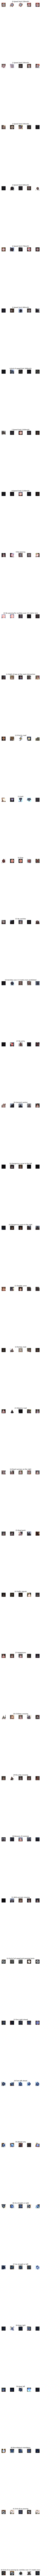

In [ ]:
num_of_samples = []
cols = 5
num_classes = noofclasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 300))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)- 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+ "-"+row["Name"])
            num_of_samples.append(len(x_selected))

###DISPLAY A BAR CHART SHOWING NO OF SAMPLES FOR EACH CATEGORY

[111, 1260, 1265, 811, 1124, 1070, 235, 814, 807, 854, 1167, 749, 1188, 1221, 478, 338, 215, 621, 691, 113, 185, 163, 221, 290, 157, 870, 348, 146, 303, 144, 238, 451, 143, 400, 231, 709, 215, 118, 1170, 181, 198, 125, 133]


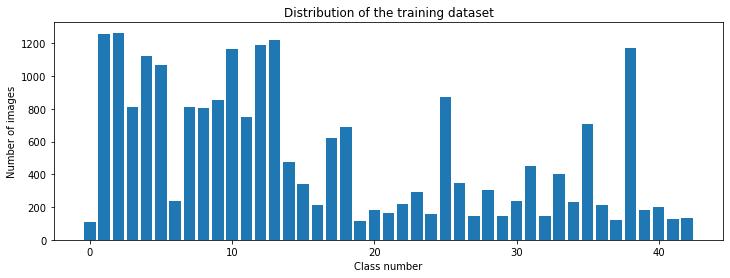

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

###PREPROCESSING THE IMAGES

In [ ]:

def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     # CONVERT TO GRAYSCALE
    img = equalize(img)      # STANDARDIZE THE LIGHTING IN AN IMAGE
    img = img/255            # TO NORMALIZE VALUES BETWEEN 0 AND 1 INSTEAD OF 0 TO 255
    return img
 
X_train=np.array(list(map(preprocessing,X_train)))  # TO IRETATE AND PREPROCESS ALL IMAGES
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))
#cv2.imshow("GrayScale Images",X_train[random.randint(0,len(X_train)-1)]) # TO CHECK IF THE TRAINING IS DONE PROPERLY

###ADD A DEPTH OF 1


In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [ ]:
print(X_train.shape)
print(X_test.shape)


(22271, 32, 32, 1)
(6960, 32, 32, 1)


### AUGMENTATAION OF IMAGES: TO MAKEIT MORE GENERIC

- Agumentation of images are done t make it more generic
- here we rotate images, shifting Left or right zoming it in so that it makes a different dataset

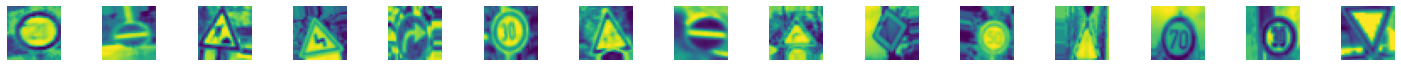

In [ ]:
dataGen= ImageDataGenerator(width_shift_range=0.1,   # 0.1 = 10%     IF MORE THAN 1 E.G 10 THEN IT REFFERS TO NO. OF  PIXELS EG 10 PIXELS
                            height_shift_range=0.1,
                            zoom_range=0.2,  # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
                            shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
                            rotation_range=10)  # DEGREES
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)  # REQUESTING DATA GENRATOR TO GENERATE IMAGES  BATCH SIZE = NO. OF IMAGES CREAED EACH TIME ITS CALLED
X_batch,y_batch = next(batches)
 
# TO SHOW AGMENTED IMAGE SAMPLES
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0],imageDimesions[1]))
    axs[i].axis('off')
plt.show()
 
 
y_train = to_categorical(y_train,noofclasses)
y_validation = to_categorical(y_validation,noofclasses)
y_test = to_categorical(y_test,noofclasses)

### CONVOLUTION NEURAL NETWORK MODEL

In [ ]:
def myModel():
    no_Of_Filters=60
    size_of_Filter=(5,5) # THIS IS THE KERNEL THAT MOVE AROUND THE IMAGE TO GET THE FEATURES.
                         # THIS WOULD REMOVE 2 PIXELS FROM EACH BORDER WHEN USING 32 32 IMAGE
    size_of_Filter2=(3,3)
    size_of_pool=(2,2)  # SCALE DOWN ALL FEATURE MAP TO GERNALIZE MORE, TO REDUCE OVERFITTING
    no_Of_Nodes = 500   # NO. OF NODES IN HIDDEN LAYERS
    model= Sequential()
    model.add((tensorflow.keras.layers.Conv2D(no_Of_Filters,size_of_Filter,input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu')))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
    model.add((tensorflow.keras.layers.Conv2D(no_Of_Filters, size_of_Filter, activation='relu')))
    model.add(tensorflow.keras.layers.MaxPooling2D(pool_size=size_of_pool)) # DOES NOT EFFECT THE DEPTH/NO OF FILTERS
 
    model.add((tensorflow.keras.layers.Conv2D(no_Of_Filters//2, size_of_Filter2,activation='relu')))
    model.add((tensorflow.keras.layers.Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add(tensorflow.keras.layers.MaxPooling2D(pool_size=size_of_pool))
    model.add(tensorflow.keras.layers.Dropout(0.5))
 
    model.add(tensorflow.keras.layers.Flatten())
    model.add(tensorflow.keras.layers.Dense(no_Of_Nodes,activation='relu'))
    model.add(tensorflow.keras.layers.Dropout(0.5)) # INPUTS NODES TO DROP WITH EACH UPDATE 1 ALL 0 NONE
    model.add(tensorflow.keras.layers.Dense(noofclasses,activation='softmax')) # OUTPUT LAYER
    # COMPILE MODEL
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model
 

In [ ]:
model = myModel()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 30)          0

#TRAIN

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 30)         

C:\Users\Reeve Lobo\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


250/250 [==============================] - 21s 23ms/step - loss: 3.4938 - accuracy: 0.0697 - val_loss: 2.0166 - val_accuracy: 0.4506
Epoch 2/30
250/250 [==============================] - 5s 19ms/step - loss: 2.1388 - accuracy: 0.3684 - val_loss: 0.9165 - val_accuracy: 0.7157
Epoch 3/30
250/250 [==============================] - 5s 20ms/step - loss: 1.4731 - accuracy: 0.5435 - val_loss: 0.5653 - val_accuracy: 0.8244
Epoch 4/30
250/250 [==============================] - 5s 20ms/step - loss: 1.1025 - accuracy: 0.6609 - val_loss: 0.3638 - val_accuracy: 0.8901
Epoch 5/30
250/250 [==============================] - 5s 19ms/step - loss: 0.9064 - accuracy: 0.7168 - val_loss: 0.2718 - val_accuracy: 0.9188
Epoch 6/30
250/250 [==============================] - 5s 19ms/step - loss: 0.7788 - accuracy: 0.7544 - val_loss: 0.2219 - val_accuracy: 0.9359
Epoch 7/30
250/250 [==============================] - 5s 19ms/step - loss: 0.6829 - accuracy: 0.7878 - val_loss: 0.1568 - val_accuracy: 0.9578
Epoch 8/3

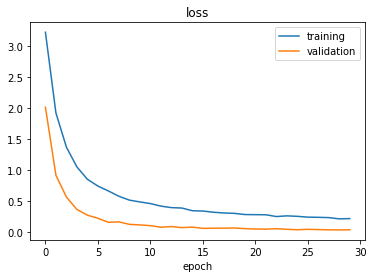

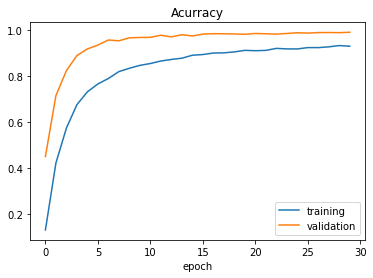

Test Score: 0.030851930379867554
Test Accuracy: 0.9918103218078613


In [ ]:
model = myModel()
print(model.summary())
history=model.fit_generator(dataGen.flow(X_train,y_train,batch_size=batch_size_val),steps_per_epoch=steps_per_epoch_val,epochs=epochs_vl,validation_data=(X_validation,y_validation),shuffle=1)
 
############################### PLOT
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])
 
 


In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model') 

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [ ]:
new_model = tensorflow.keras.models.load_model('saved_model/my_model')

In [ ]:
frameWidth= 640         # CAMERA RESOLUTION
frameHeight = 480
brightness = 180
threshold = 0.75         # PROBABLITY THRESHOLD
font = cv2.FONT_HERSHEY_SIMPLEX

In [ ]:
cap = cv2.VideoCapture(0)

In [ ]:
# SETUP THE VIDEO CAMERA
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)

# IMPORT THE TRANNIED MODEL
pickle_in=open("model_trained.p","rb")  ## rb = READ BYTE
model=pickle.load(pickle_in)
 
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img
def getCalssName(classNo):
    if   classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h' 
    elif classNo == 5: return 'Speed Limit 80 km/h' 
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vechiles'
    elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'End of no passing'
    elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'
    
while True:
 # READ IMAGE
      success, imgOrignal = cap.read()
 
# PROCESS IMAGE
      img = np.asarray(imgOrignal)
      img = cv2.resize(img, (32, 32))
      img = preprocessing(img)
      cv2.imshow("Processed Image", img)
      img = img.reshape(1, 32, 32, 1)
      cv2.putText(imgOrignal, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
      cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA) 

# PREDICT IMAGE
predictions = model.predict(img)
classIndex = model.predict_classes(img)
probabilityValue =np.amax(predictions)
if probabilityValue > threshold:

#print(getCalssName(classIndex))
      cv2.putText(imgOrignal,str(classIndex)+" "+str(getCalssName(classIndex)), (120, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
      cv2.putText(imgOrignal, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
      cv2.imshow("Result", imgOrignal)
      
 if cv2.waitKey(1) and 0xFF == ord('q'):
  break  